## Entropy

Entropy measures the amount of uncertainty or the average amount of information in a single probability distribution.


### Definition
- **Low entropy state**: Predictable system, contains small amount of information
- **High entropy state**: Unpredictable system, contains large amount of information


### Mathematical Formula
$$
H(X) = -\sum_{i} p_i \log(p_i)
$$


**where**:
- H(X) is the entropy
- p_i is the probability of each outcome in event X
- -log(p_i) is the surprise (amount of information about output i)
- Σ sums all pieces of information to measure the overall predictability (entropy) of the event

The sum of all probabilities must equal 1: $$\sum_{i} p_i = 1$$

**Learning materials**
- https://www.youtube.com/watch?v=KHVR587oW8I

In [7]:

import numpy as np

def information_content(p):
    return -np.log2(p)

print(f"Information content of a fair coin flip (p=0.5): {information_content(0.5)} bits")
print(f"Information content of rolling of a die (p=1/6): {information_content(1/6)} bits")
print(f"Information content of a very likely event (p=0.9): {information_content(0.9)} bits")


Information content of a fair coin flip (p=0.5): 1.0 bits
Information content of rolling of a die (p=1/6): 2.584962500721156 bits
Information content of a very likely event (p=0.9): 0.15200309344504995 bits


**Entropy of rolling a die is bigger than entropy of coin flip**, because it has more possible outcomes, so you are more surprised to each possible outcome.

In [22]:
d_die_rolling = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
d_coin_flip = [1/2, 1/2]

def get_entropy(distribution):
    return sum([p * -np.log2(p) for p in distribution]) 

print(f"Rolling a die entropy: {get_entropy(d_die_rolling)}")
print(f"Coin flip entropy: {get_entropy(d_coin_flip)}")

Rolling a die entropy: 2.584962500721156
Coin flip entropy: 1.0


### Why using log?
1. -log because log of 0 < p < 1 is negative, but the amount of info should be positive

2. log of base 2 is used because of binary representation of information (1 bit represents 2 states, 2 bits represent 4 states, etc.)

3. log ideally represents the relationship between probabilities and surprise
 
**Suprise** - amount of information gained from an event (bigger surprise = more information, higher enq)
(surprise of each independent output of the same probability contributes to the overall surprise equally, 

**which means** the roll die = 1 with probability 1/6 is as surprising as the roll die = 6 with probability 1/6, 

if the probability of two rolls is 1/6 * 1/6 then the overall surprise is **-log2(1/6) + -log2(1/6)**

Text(0, 0.5, 'surprise')

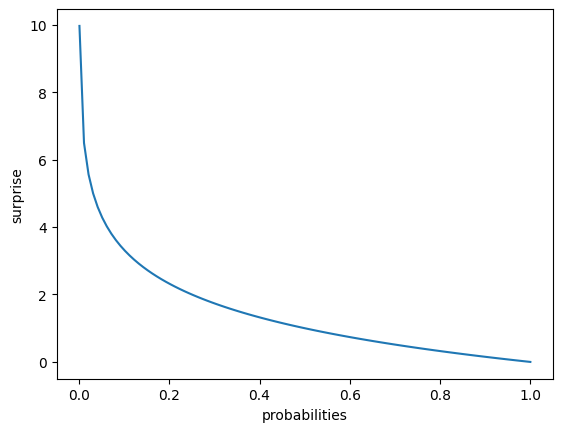

In [8]:
import matplotlib.pyplot as plt

x = np.linspace(0.001, 1, 100)
y = -np.log2(x)

plt.plot(x, y, label="y= -log(x)")
plt.xlabel('probabilities')
plt.ylabel('surprise')

## Cross entropy
Measures how well predicted distribution describes the events from true distribution.

From the information theory perspective it measures how many bits do we need to describe the event from the true distribution with the help of the predicted distribution. 
Always ≥ then entropy

### Formula
$$
H(p, q) = -\sum_{i} p_i \log(q_i)
$$

where:
- p_i is the true probability of the event
- q_i is the predicted probability of the event

p_i acts as a weighting factor (how much of predicted information will be used in a total loss):

In [18]:
p = np.array([0.7, 0.3]) # true probabilities
q = np.array([0.6, 0.4]) # predicted probabilities

# Each term in cross entropy:
print("First outcome contribution:", -0.7 * np.log2(0.6))  # Higher weight because it's more common
print("Second outcome contribution:", -0.3 * np.log2(0.4))  # Lower weight because it's less common

First outcome contribution: 0.5158759159163443
Second outcome contribution: 0.39657842846620867


-log(q_i) measures an amount of information gained from the prediction

-log2 give high penalties for small probabilities

In [15]:
array = [0.8, 0.5, 0.2]

for i in array:
    penalty = -np.log2(i)
    print(f"Prediction {i}, penalty: {penalty}")

Prediction 0.8, penalty: 0.3219280948873623
Prediction 0.5, penalty: 1.0
Prediction 0.2, penalty: 2.321928094887362


### Comparison of total loss for:
 
**Close predictions:** 
- [0.8, 0.2] - true probabilities
- [0.7, 0.3] - predicted probabilities

**Wrong predictions:**
- [0.8, 0.2] - true probabilities
- [0.2, 0.8] - predicted probabilities


In [17]:
p = [0.8, 0.2]
q1 = [0.7, 0.3]
q2 = [0.2, 0.8]

def calculate_loss(p,q):
    print(f"Loss for predictions = {q}, true = {p}")
    total_loss = 0
    for idx, i in enumerate(p):
        ij_loss = i * -np.log2(q[idx])
        total_loss += ij_loss
        print(f"true probability={i}, prediction={q[idx]}, loss = {ij_loss}")

    return total_loss

print(calculate_loss(p, q1))
print(calculate_loss(p, q2))

Loss for predictions = [0.7, 0.3], true = [0.8, 0.2]
true probability=0.8, prediction=0.7, loss = 0.4116585382638067
true probability=0.2, prediction=0.3, loss = 0.3473931188332413
0.759051657097048
Loss for predictions = [0.2, 0.8], true = [0.8, 0.2]
true probability=0.8, prediction=0.2, loss = 1.8575424759098897
true probability=0.2, prediction=0.8, loss = 0.06438561897747246
1.9219280948873623


## Kullback-Leibler divergence
Measures how much one distribution differs from another.

With respect to information theory it represents how many extra bits do we need to describe the event from one distribution with a help of another

### Mathematical formula
$$
D_{KL}(p, q) = H(p, q) - H(p)
$$

where:
- p is the true probability distribution
- q is the predicted probability distribution

KL Divergence hows how many extra bits do we waste, while cross entropy is focused on how many bits do we need.

In [26]:
# Model that classifies pets images
# Actual dataset: 60% - cats, 20% - dogs, 20% - rabbits
# Predicted probabilities: 70% - cats, 10% - dogs, 20% rabbits

p = [0.6, 0.2, 0.2]
q = [0.8, 0.1, 0.1]

def get_kl_divergence(e, c_e):
    return c_e - e

entropy = get_entropy(p)
cross_entropy = calculate_loss(p, q)
kl_divergence = get_kl_divergence(entropy, cross_entropy)

print(f"Entropy of q = {entropy}")
print(f"Cross entropy loss = {cross_entropy}")
print(f"Kullback-Leibler divergence = {kl_divergence}")

Loss for predictions = [0.8, 0.1, 0.1], true = [0.6, 0.2, 0.2]
true probability=0.6, prediction=0.8, loss = 0.19315685693241738
true probability=0.2, prediction=0.1, loss = 0.6643856189774725
true probability=0.2, prediction=0.1, loss = 0.6643856189774725
Entropy of q = 1.3709505944546687
Cross entropy loss = 1.5219280948873624
Kullback-Leibler divergence = 0.15097750043269365


### Applications

1. Good for understanding how many room for improvement left

2. To compare two models